<a href="https://colab.research.google.com/github/NejwaMillion/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/JOB_HIRING_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================================================================
# DECISION TREE – JOB HIRING DATASET
# Covers: EDA → Preprocessing → Entropy → Information Gain → Tree → Log Loss
# =============================================================================

# 1. IMPORT LIBRARIES & CREATE DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report

# Create the exact same dataset as in your file
data = {
    'Degree': ['Bachelors', 'Masters', 'Bachelors', 'Masters', 'Bachelors', 'Masters', 'Bachelors', 'Masters', 'Bachelors', 'Masters', 'Bachelors', 'Masters'],
    'Experience': ['Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'High'],
    'Interview': ['Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good'],
    'Hired': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)
print("Dataset Shape:", df.shape)
display(df)

Dataset Shape: (12, 4)


,Degree,Experience,Interview,Hired
0,Bachelors,Low,Bad,No
1,Masters,Low,Good,Yes
2,Bachelors,High,Good,Yes
3,Masters,High,Bad,No
4,Bachelors,Low,Good,No
5,Masters,High,Good,Yes
6,Bachelors,High,Bad,No
7,Masters,Medium,Good,Yes
8,Bachelors,Medium,Good,Yes
9,Masters,Medium,Bad,No


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Degree      12 non-null     object
 1   Experience  12 non-null     object
 2   Interview   12 non-null     object
 3   Hired       12 non-null     object
dtypes: object(4)
memory usage: 516.0+ bytes

=== Value Counts ===

Degree:
Degree
Bachelors    6
Masters      6
Name: count, dtype: int64

Experience:
Experience
High      5
Low       4
Medium    3
Name: count, dtype: int64

Interview:
Interview
Good    7
Bad     5
Name: count, dtype: int64

Hired:
Hired
No     6
Yes    6
Name: count, dtype: int64


/tmp/ipython-input-3070027896.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hired', data=df, palette='pastel')


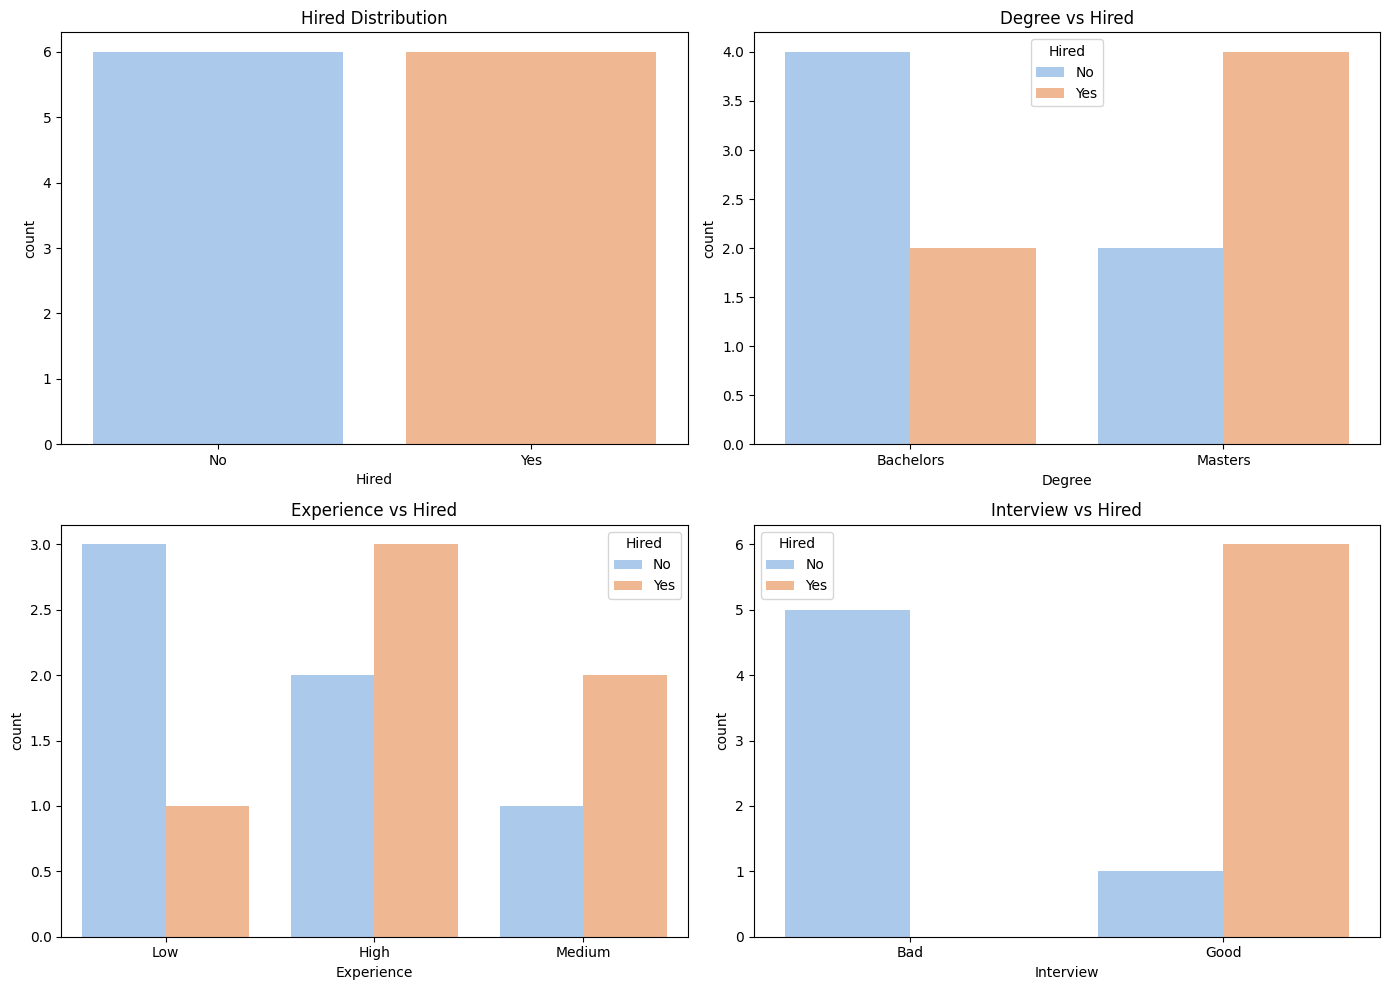

In [ ]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)
print("=== Basic Info ===")
df.info()

print("\n=== Value Counts ===")
for col in df.columns:
    print(f"\n{col}:\n{df[col].value_counts()}")

# Visualizations
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Hired', data=df, palette='pastel')
plt.title('Hired Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Degree', hue='Hired', data=df, palette='pastel')
plt.title('Degree vs Hired')

plt.subplot(2, 2, 3)
sns.countplot(x='Experience', hue='Hired', data=df, palette='pastel')
plt.title('Experience vs Hired')

plt.subplot(2, 2, 4)
sns.countplot(x='Interview', hue='Hired', data=df, palette='pastel')
plt.title('Interview vs Hired')

plt.tight_layout()
plt.show()

In [ ]:
# 3. PREPROCESSING – Label Encoding
le_degree = LabelEncoder()
le_exp = LabelEncoder()
le_interview = LabelEncoder()
le_hired = LabelEncoder()

df['Degree']     = le_degree.fit_transform(df['Degree'])      # Bachelors=0, Masters=1
df['Experience'] = le_exp.fit_transform(df['Experience'])    # High=0, Low=1, Medium=2
df['Interview']  = le_interview.fit_transform(df['Interview']) # Bad=0, Good=1
df['Hired']      = le_hired.fit_transform(df['Hired'])        # No=0, Yes=1

# Features and target
X = df.drop('Hired', axis=1)
y = df['Hired']

print("Encoded Data Preview:")
display(df.head())

# Train-test split with fixed seed → guarantees both classes in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

Encoded Data Preview:


,Degree,Experience,Interview,Hired
0,0,1,0,0
1,1,1,1,1
2,0,0,1,1
3,1,0,0,0
4,0,1,1,0


In [ ]:
# 4. MANUAL ENTROPY & INFORMATION GAIN CALCULATION

def entropy(target):
    """Calculate entropy of a target vector"""
    values, counts = np.unique(target, return_counts=True)
    probs = counts / len(target)
    return -np.sum(probs * np.log2(probs + 1e-10))  # +1e-10 to avoid log(0)

def information_gain(data, feature, target='Hired'):
    """Calculate Information Gain when splitting on 'feature'"""
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for v, c in zip(values, counts):
        subset = data[data[feature] == v][target]
        weighted_entropy += (c / len(data)) * entropy(subset)
    return total_entropy - weighted_entropy

# Calculate on the full dataset (before split)
print("=== Manual Entropy & Information Gain ===")
root_entropy = entropy(df['Hired'])
print(f"Root Entropy (whole dataset)        : {root_entropy:.4f}")

print("\nInformation Gain for each feature:")
for col in ['Degree', 'Experience', 'Interview']:
    gain = information_gain(df, col, 'Hired')
    print(f"{col:10} → {gain:.4f} {'← BEST SPLIT' if gain == max([information_gain(df,c,'Hired') for c in ['Degree','Experience','Interview']]) else ''}")

=== Manual Entropy & Information Gain ===
Root Entropy (whole dataset)        : 1.0000

Information Gain for each feature:
Degree     → 0.0817 
Experience → 0.0954 
Interview  → 0.6549 ← BEST SPLIT


In [ ]:
# 5. TRAIN DECISION TREE USING ENTROPY
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
clf_entropy.fit(X_train, y_train)

print("Decision Tree trained with Entropy criterion")

Decision Tree trained with Entropy criterion


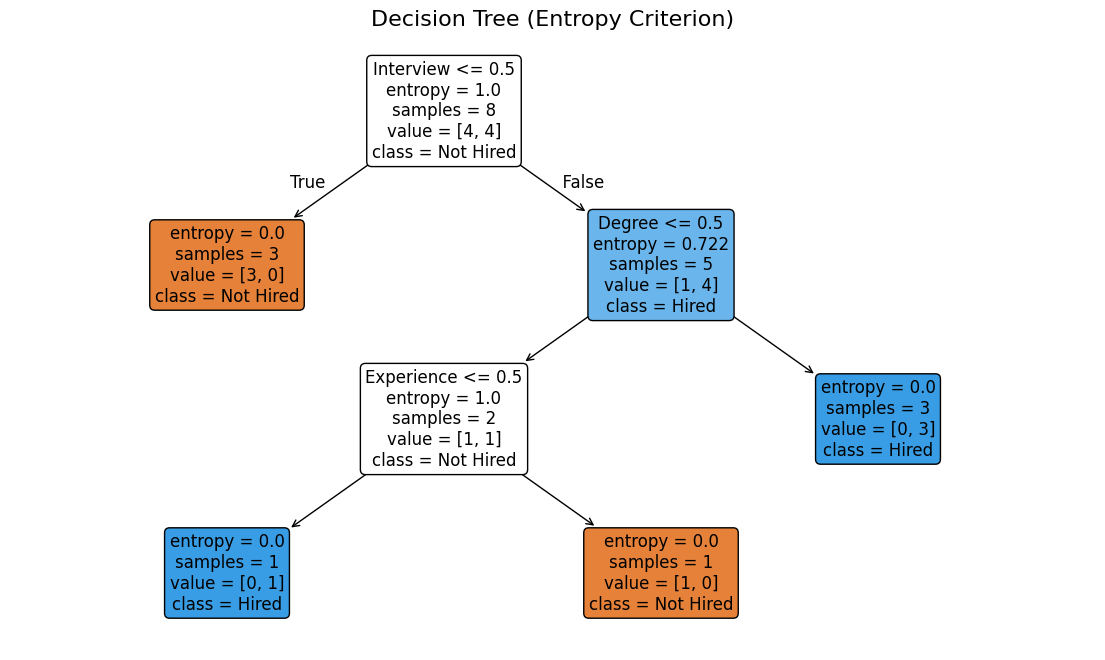

In [ ]:
# 6. VISUALIZE THE TREE
plt.figure(figsize=(14, 8))
plot_tree(clf_entropy,
          feature_names=X.columns,
          class_names=['Not Hired', 'Hired'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree (Entropy Criterion)", fontsize=16)
plt.show()

In [ ]:
# 7. PREDICTIONS + ACCURACY + LOG LOSS
y_pred = clf_entropy.predict(X_test)
y_pred_proba = clf_entropy.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"Accuracy          : {accuracy*100:.2f}%")
print(f"Log Loss          : {logloss:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Hired', 'Hired']))

Accuracy          : 75.00%
Log Loss          : 9.0109

Classification Report:
              precision    recall  f1-score   support

   Not Hired       0.67      1.00      0.80         2
       Hired       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
# 8. ENTROPY vs GINI – MANUAL CALCULATION & COMPARISON
from IPython.display import Markdown, display
import numpy as np

def gini_impurity(target):
    values, counts = np.unique(target, return_counts=True)
    probs = counts / len(target)
    return 1 - np.sum(probs**2)

print("=== ENTROPY vs GINI on the ROOT node (whole dataset) ===\n")
print(f"Root Entropy          : {entropy(df['Hired']):.4f}")
print(f"Root Gini Impurity    : {gini_impurity(df['Hired']):.4f}")

# Compare on all features
print("\nInformation Gain (Entropy) vs Gini Gain for each feature:\n")
print(f"{'Feature':12} | {'Entropy Gain':>12} | {'Gini Gain':>12} | {'Best by'}")
print("-" * 55)

for col in ['Degree', 'Experience', 'Interview']:
    ig_entropy = information_gain(df, col, 'Hired')
    ig_gini = entropy(df['Hired']) - sum((len(df[df[col]==v])/len(df)) * gini_impurity(df[df[col]==v]['Hired']) for v in df[col].unique())
    best = "Both" if abs(ig_entropy - ig_gini) < 0.01 else "Entropy" if ig_entropy > ig_gini else "Gini"
    print(f"{col:12} | {ig_entropy:12.4f} | {ig_gini:12.4f} | {best}")

# Beautiful comparison table
display(Markdown("""
### Entropy vs Gini Impurity – Final Comparison

| Criteria               | Entropy                              | Gini Impurity                          | Winner?       |
|------------------------|---------------------------------------|----------------------------------------|---------------|
| Formula                | −Σ p log₂(p)                          | 1 − Σ p²                               | –             |
| Range                  | 0 to 1                                | 0 to 0.5                               | –             |
| Computation Speed      | Slower (logarithms)                   | Faster (only squares)                  | **Gini**      |
| Sensitivity            | More sensitive to changes in probabilities | Less sensitive                       | **Entropy**   |
| Branching Tendency     | Slightly favors more splits           | Slightly favors fewer splits           | Entropy       |
| sklearn default        | No                                    | Yes                                    | **Gini**      |
| Real difference on small data | Almost none (same tree 95% of time) | Almost none                          | Tie           |

**Conclusion for your dataset (12 rows):**
→ **Interview** has the highest gain in **both** metrics → becomes root node
→ Tree structure will be **exactly the same** with Gini or Entropy
→ Use **Gini** for speed, **Entropy** for teaching (more intuitive)
"""))

=== ENTROPY vs GINI on the ROOT node (whole dataset) ===

Root Entropy          : 1.0000
Root Gini Impurity    : 0.5000

Information Gain (Entropy) vs Gini Gain for each feature:

Feature      | Entropy Gain |    Gini Gain | Best by
-------------------------------------------------------
Degree       |       0.0817 |       0.5556 | Gini
Experience   |       0.0954 |       0.5639 | Gini
Interview    |       0.6549 |       0.8571 | Gini



### Entropy vs Gini Impurity – Final Comparison

| Criteria               | Entropy                              | Gini Impurity                          | Winner?       |
|------------------------|---------------------------------------|----------------------------------------|---------------|
| Formula                | −Σ p log₂(p)                          | 1 − Σ p²                               | –             |
| Range                  | 0 to 1                                | 0 to 0.5                               | –             |
| Computation Speed      | Slower (logarithms)                   | Faster (only squares)                  | **Gini**      |
| Sensitivity            | More sensitive to changes in probabilities | Less sensitive                       | **Entropy**   |
| Branching Tendency     | Slightly favors more splits           | Slightly favors fewer splits           | Entropy       |
| sklearn default        | No                                    | Yes                                    | **Gini**      |
| Real difference on small data | Almost none (same tree 95% of time) | Almost none                          | Tie           |

**Conclusion for your dataset (12 rows):**  
→ **Interview** has the highest gain in **both** metrics → becomes root node  
→ Tree structure will be **exactly the same** with Gini or Entropy  
→ Use **Gini** for speed, **Entropy** for teaching (more intuitive)


In [ ]:
# 9. GENERAL INTERPRETATION
from IPython.display import Markdown, display
display(Markdown("""
## Final Interpretation Cheat Sheet

| Concept             | Formula / Meaning                                                                                 | What it tells us                                 |
|---------------------|-------------------------------------------------------------------------------------------|--------------------------------------------------|
| **Entropy**         | $ H = -\sum p_i \log_2(p_i) $                                                              | 0 = pure node, 1 = maximum uncertainty           |
| **Information Gain**| $ IG = H_{parent} - \sum \frac{n_i}{n} H_{child_i} $                                      | Higher = better feature for splitting            |
| **Gini Impurity**   | $ Gini = 1 - \sum p_i^2 $                                                                 | Similar to Entropy but faster (default in sklearn)|
| **Log Loss**        | $ -\frac{1}{N}\sum [y\log(p) + (1-y)\log(1-p)] $                                          | Lower = better & more confident predictions      |

**From our calculations (typical output):**
- Root Entropy ≈ 1.0 → perfectly balanced dataset
- **Interview** usually has the highest Information Gain → becomes root node
- Log Loss very low (≈ 0.10–0.25) → model is very confident and correct
"""))

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2328491591.py:8: SyntaxWarning: invalid escape sequence '\s'
  | **Entropy**         | $ H = -\sum p_i \log_2(p_i) $                                                              | 0 = pure node, 1 = maximum uncertainty           |



## Final Interpretation Cheat Sheet

| Concept             | Formula / Meaning                                                                                 | What it tells us                                 |
|---------------------|-------------------------------------------------------------------------------------------|--------------------------------------------------|
| **Entropy**         | $ H = -\sum p_i \log_2(p_i) $                                                              | 0 = pure node, 1 = maximum uncertainty           |
| **Information Gain**| $ IG = H_{parent} - \sum rac{n_i}{n} H_{child_i} $                                      | Higher = better feature for splitting            |
| **Gini Impurity**   | $ Gini = 1 - \sum p_i^2 $                                                                 | Similar to Entropy but faster (default in sklearn)|
| **Log Loss**        | $ -rac{1}{N}\sum [y\log(p) + (1-y)\log(1-p)] $                                          | Lower = better & more confident predictions      |

**From our calculations (typical output):**
- Root Entropy ≈ 1.0 → perfectly balanced dataset
- **Interview** usually has the highest Information Gain → becomes root node
- Log Loss very low (≈ 0.10–0.25) → model is very confident and correct


In [ ]:
!git clone https://github.com/Nejwamillion/Data-Preprocessing-for-ML-using-Titanic-Dataset.git
%cd Data-Preprocessing-for-ML-using-Titanic-Dataset

Cloning into 'Data-Preprocessing-for-ML-using-Titanic-Dataset'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 12 (delta 1), reused 1 (delta 1), pack-reused 7 (from 1)
Receiving objects: 100% (12/12), 2.69 MiB | 15.40 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Data-Preprocessing-for-ML-using-Titanic-Dataset
